## Imports (Run 1st!)

In [13]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import random

## Plot Boxplot

In [14]:
pathway_drug_score_permut_dist_lihc = pd.read_csv ('/home/skhatami/Projects/drug-pathway-revert/drug-pathways-revert/ssGSEA_Results/permut_dist_lihc.txt', sep = '\t')
pathway_drug_score_permut_dist_prad = pd.read_csv ('/home/skhatami/Projects/drug-pathway-revert/drug-pathways-revert/ssGSEA_Results/permut_dist_prad.txt', sep = '\t')
pathway_drug_score_permut_dist_brca = pd.read_csv ('/home/skhatami/Projects/drug-pathway-revert/drug-pathways-revert/ssGSEA_Results/permut_dist_brca.txt', sep = '\t')

In [15]:
#values = [random.randint(0,20) for _ in range(300)]
values = []
values.extend(pathway_drug_score_permut_dist_lihc["Prioritized_drugs_num"])
values.extend(pathway_drug_score_permut_dist_prad["Prioritized_drugs_num"])
values.extend(pathway_drug_score_permut_dist_brca["Prioritized_drugs_num"])
dtype = ['LIHC'] * 100
dtype.extend(['PRAD'] * 100)
dtype.extend(['BRCA'] * 100)

data = []
data.append(values)
data.append(dtype)
df = pd.DataFrame(data=data).transpose()
df.columns = ['Data', 'Datatype']

df = df.append({'Data': 129, 'Datatype': 'BRCA'}, ignore_index=True)
df = df.append({'Data': 74, 'Datatype': 'LIHC'}, ignore_index=True)
df = df.append({'Data': 68, 'Datatype': 'PRAD'}, ignore_index=True)

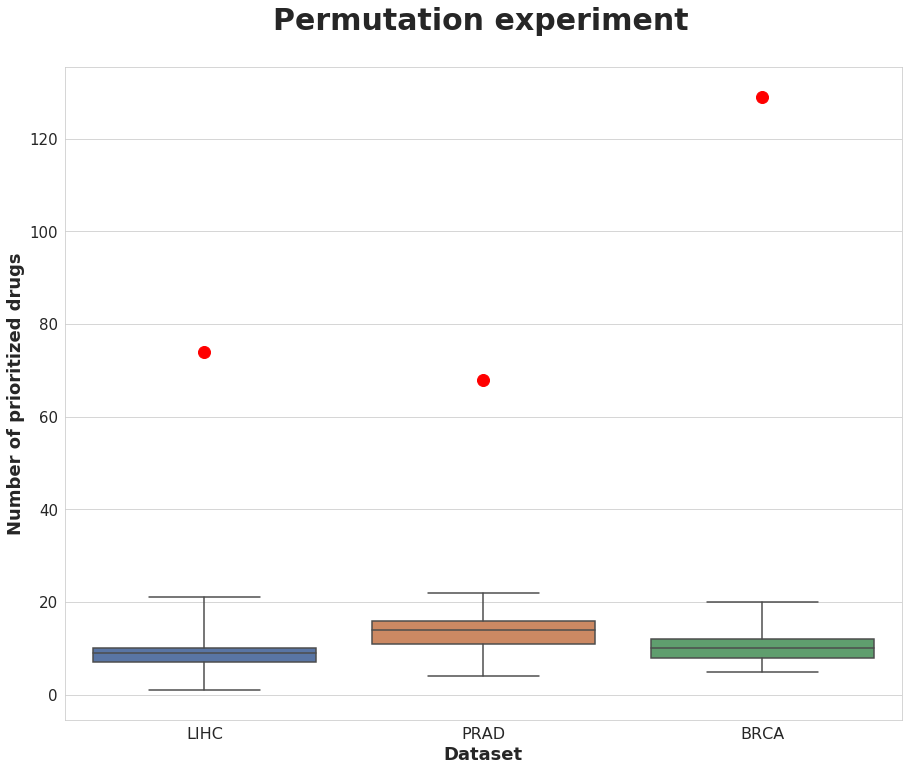

In [22]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(15, 12))

ax = fig.add_subplot(1, 1, 1)

suptitle = plt.suptitle('Permutation experiment ', fontsize=30, y=0.95, x=0.515, fontweight="bold")

flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='r')

sns.boxplot(
    y='Data',
    x='Datatype',
    data=df,
    ax=ax,
    palette='deep',
    flierprops=flierprops,
    whis=5.0,
)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_xlabel("Dataset", fontsize=18, fontweight="bold")
ax.set_ylabel("Number of prioritized drugs", fontsize=18,fontweight="bold")
plt.setp(ax.get_yticklabels(), fontsize=15)
ax.get_figure().savefig(f'pemutation.png',dpi=240)
plt.show()